*The code snippet assumes Anaconda 5.2.0 version of Python virtual environment*

<div class="alert alert-info">
    <h4>Acknowledgement</h4>
    <p>The materials on this post are based the two research paper, <a href="https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf">Distributed Representations of Words and Phrases and their Compositionality</a> (Mikolov et al., 2013) and <a href="https://arxiv.org/pdf/1411.2738.pdf">word2vec Parameter Learning Explained</a> (Rong, 2014).</p>
</div>

Word Embedding - represent words in a vector space



## Paradigm Shift in Word Embedding: Frequency-Based to Prediction-Based

Document 1: "all that glitters is not gold"

Document 2: "all is well that ends well"

++ Pandas Table

Limitation of Count-Based Method:
1. someting
2. something
3. something

To combat these issues, a novel prediction-based word embedding technique called Word2Vec was introduced by Thomas Mikolov in 2013. 

## Prediction-based word-embedding: Word2Vec Skip-Gram

picture of mikolov skip-gram diagram + my diagram of window_size = 2

skip-gram predicts context words given a center word.


<div class="alert alert-info">
    <h4>Notes: CBOW and Skip-Gram</h4>
    <p>There are two models for Word2Vec: <i>Continous Bag Of Words (CBOW)</i> and <i>Skip-Gram</i>. While Skip-Gram model predicts context words given a center word, CBOW model predicts a center word given context words. According to Mikolov:</p>
    <p><i>Skip-gram</i>: works well with small amount of the training data, represents well even rare words or phrases</p>
    <p><i>CBOW</i>: several times faster to train than the skip-gram, slightly better accuracy for the frequent words</p>
    <p>Skip-Gram model is a better choice most of the time due to its ability to predict infrequent words, but this comes at the price of increased computational cost. If training time is a big concern, and you have large enough data to overcome the issue of predicting infrequent words, CBOW model may be a more viable choice. The details of CBOW model won't be covered in this post.</p>
</div>

A natural question is, why do we predict context words? We do it so that we can optimize the weight matrix and get the correct word-embedding matrix. This is described [below]:


This will make more sense as you understand the structure of Skip-Gram model. 

## Defining Cost Function



The cost function defined in the original <a href="https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf">Word2Vec original paper</a> has the following equation:

$$ J(\theta) = -\frac{1}{T} \sum^T_{t=1} \sum_{-m\leq j \leq m} \log p(w_{t+j} \mid w_t ; \theta) $$


<div id="eq-2-5">$$ \displaystyle \int_0^{S_v(z)} dS_v = \int_0^z \rho_{bulk}(z) g \: dz \tag{2.5} $$</div>

# Neural Network Structure of Skip-Gram

How does predicting context words help with constructing Word2Vec model and representing words in a vector space? One needs to look into the structure of Skip-Gram model to gain insights about their correlation. 

For illustration purpose, let's assume that the entire corpus is composed of the quote from the Game of Thrones, <i>"The man who passes the sentence should swing the sword"</i>, by Ned Stark. There are 10 words ($T = 10$), and 8 unique words ($V = 8$). 

Note that in real life, the corpus is much bigger than just one sentence. 

<blockquote class="quote">
  The man who passes the sentence should swing the sword.
  <span>- Ned Stark</span>
</blockquote>

We will use <code>window=1</code>, and assume that <i>'passes'</i> is the current center word, making <i>'who'</i> and <i>'the'</i> context words. <code>window</code> is a hyper-parameter that can be empirically tuned. It typically has a range of 2-10.

<div class="row give-margin-inline-big-plot">
    <div class="col"><img src="jupyter_images/quote_ned_stark.png"></div>
    <div class="col-12"><p class="image-description">Figure 1: Training Window</p></div>
</div>

For illustration purpose, a three-dimensional neural net will be constructed. In *gensim*, this can be implemented by setting <code>size=3</code>. This makes $N = 3$. Just like <code>window</code>, <code>size</code> is a hyper-parameter that can be empirically tuned. In real life, a typical Word2Vec model has 200-600 neurons. 

<pre>
    <code class="language-python">
        from gensim.models import Word2Vec

        model = Word2Vec(corpus, size=3, window=1)
    </code>
</pre>

This means that the input weight matrix ($W_{input}$) will have a size of $8 \times 3$, and output weight matrix ($W_{output}^T$) will have a size of $3 \times 8$. Recall that the corpus, <i>"The man who passes the sentence should swing the sword"</i>, has 8 unique vocabularies ($V = 8$). 

<div class="row">
    <div class="col"><img src="jupyter_images/word2vec_skip-gram.png" style="margin: 0;"></div>
    <div class="col-12"><p class="image-description">Figure 2: Skip-Gram model structure</p></div>
</div>

## Training: Forward Propagation

The word embedding matrices ($W_{input}$, $W_{output}$) in Skip-Gram are optimized through forward and backward propagations. For each iteration of forward + backward propagations, the model learns to reduce prediction error, thus achieving higher quality embedding matrices that better captures relationships among words. 

Forward propagation includes obtaining the probability distribution of words ($y_{pred}$ in *figure 2*) given a center word, and backward propagation includes calculating the prediction error, and updating the weight (embedding) matrices to minimize the prediction error.

## Derive equations for Y_predict

### Input Layer ($x$)

The input layer is a $V$-dim one-hot encoded vector. Every element in the vector is 0 except one element that corresponds to the center word. Input vector is multiplied with the input weight matrix ($W_{input}$) of size $V \times N$, and yields a hidden (projection) layer ($h$) of $N$-dim vector. Because the input layer is one-hot encoded, it makes the input weight matrix ($W_{input}$) to behave like a *look-up table* for the center word. Assuming epoch number of 1 (<code>iter=1</code> in *gensim* Word2Vec implementation) and stochastic gradient descent, the input vector is injected into the network $T$ times for every word in the corpus and makes $T$ updates to the weight matrix ($\theta$).

<div class="row give-margin-inline-big-plot">
    <div class="col"><img src="jupyter_images/one-hot-vector.png"></div>
    <div class="col-12"><p class="image-description">Figure 2: One-hot encoded input vector and parameter update</p></div>
</div>

<div class="alert alert-info">
    <h4>Notes: Stochastic Gradient Descent</h4>
    <p>The goal of any machine learning model is to find the optimal values of a weight matrix ($\theta$) to minimize prediction error. A general update equation for weight matrix looks like the following:</p>
    <p><center style="margin-top: 20px">$\theta_{new}=\theta_{old}-\eta\cdot\nabla_{\theta}J(\theta)$</center></p>
    <p>$\eta$ is learning rate, $\nabla_{\theta}$ is gradient for the weight matrix, and $J(\theta)$ is the cost function that has different forms for each model. The cost function for the Skip-Gram model proposed in the <a href="https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf">Word2Vec original paper</a> has the following equation:</p>
    <p><center style="margin-top: 20px">$$J(\theta) = -\frac{1}{T} \sum^T_{t=1} \sum_{-m\leq j \leq m} \log p(w_{t+j} \mid w_t ; \theta)$$</center></p>
    <p>Here, what gives us headache is the expression, $\frac{1}{T} \sum^T_{t=1}$, because $T$ can be larger than billions or more in many NLP applications. It is basically telling us that billions of iterations need to be computed to make just one update to the weight matrix ($\theta$). In order to mitigate this computational burden, the author of the paper states that Stochastic Gradient Descent (SGD) was used for parameter optimization. SGD removes the expression, $\frac{1}{T} \sum^T_{t=1}$, from the cost function and performs parameter update for each training example, $w^{(t)}$:</p>
    <p><center style="margin-top: 20px">$$J_{t}(\theta;w^{(t)}) = -\sum_{-m\leq j \leq m} \log p(w_{t+j} \mid w_t ; \theta)$$</center></p>
    <p>Then, the new parameter update equation for SGD becomes:</p>
    <p><center style="margin-top: 20px">$\theta_{new}=\theta_{old}-\eta\cdot\nabla_{\theta}J_{t}(\theta;w^{(t)})$</center></p>
    <p>The original vanilla graident descent makes $1$ parameter update for $T$ training samples, but the new update equation using SGD makes $T$ parameter update for $T$ training samples. However, this comes at the price of higher fluctuation (or variance) in minimizing prediction error.</p>
</div>

#### Input and Output Weight Matrix  ($W_{input}$, $W_{output}$)

Why does Skip-Gram model attempt to predict context words given a center word? How does predicting context words help with quantifying words and representing them in a vector space? In fact, the ultimate goal of the model is not to predict context words, but to construct the word embedding matrices ($W_{input}$, $W_{output}$) that best caputure relationship among words in a vector space. Skip-Gram achieves this by using a neural net — it optimizes the weight (embedding) matrices by adjusting the weight matrix to minimize the prediction error ($y_{pred} - y_{true}$). This will make more sense once you understand how the embedding matrix behaves like a *look-up table*.

Each row in a word-embedding matrix is a word-vector for each word. Consider the following word-embedding matrix, $W_{input}$.

<div class="row give-margin-inline-plot">
    <div class="col"><img src="jupyter_images/embedding_matrix_input.png" style="height: 300px;"></div>
    <div class="col-12"><p class="image-description">Figure 3: Word-embedding matrix, $W_{input}$</p></div>
</div>

The words of our interest are *"passes"* and *"swing"*. *"passes"* has a word vector of $[0.1 \quad 0.2 \quad 0.7]$ and *"swing"* has $[-2 \quad 0.2 \quad 0.8]$. Since we set the size of the weight matrix to be <code>size=3</code>, the matrix is three-dimensional, and can be visualized in a 3D vector space:

<div class="row give-margin full_screen_margin">
    <div class="col"><img src="jupyter_images/word2vec_3d.png" style="height: 300px;"></div>
    <div class="col-12"><p class="image-description">Figure 4: 3D visualization of word vectors in embedding matrix</p></div>
</div>

Optimizing the embedding (weight) matrices means placing words in a correct vector space, and as a result, the model will be able to capture meaningful relationships among words in the vector space.

<div class="alert alert-info">
    <h4>Notes: $\theta$ in cost function</h4>
    <p>There are two weight matrices that need to be optimized in Skip-Gram model: $W_{input}$ and $W_{output}$. Often times in neural net, the weights are expressed as $\theta$. In Skip-Gram, $\theta$ is a concatenation of input and output weight matrices — $[W_{input} \quad W_{output}^T]$.</p>
    <div id="eq-2-5">$$ \theta = [W_{input} \quad W_{output}] = \left[ \begin{array}{l} u_{the} \\ u_{passes} \\ \vdots \\ u_{who} \\  v_{the} \\ v_{passes} \\ \vdots \\ v_{who} \end{array} \right] \in \mathbb{R}^{2NV} \tag{2.5}$$</div>
    <p>$\theta$ has a size of $2V \times N$, where $V$ is the number of unique vocab in a corpus, and $N$ is the number of neurons in the network. $2$ is multipled to $V$ because there are two weight matrices, $W_{input}$ and $W_{output}$. $u$ is a word vector from $W_{input}$ and $v$ is a word vector from $W_{output}$. The each word vectors are $V$-dim row vectors from input and output embedding matrix.</p>
</div>

#### Hidden (Projection) Layer ($h$)

Skip-Gram uses a neural net with one hidden layer. In the context of natural language processing, hidden layer is often referred to as a *projection* layer, because $h$ is essentially an 1D vector projected by the one-hot encoded input vector.

<div class="row give-margin full_screen_margin">
    <div class="col"><img src="jupyter_images/skip-gram_lookup.png"></div>
    <div class="col-12"><p class="image-description">Figure 5: Computing projection layer</p></div>
</div>

$h$ is obtained by multiplying the input word embedding matrix with the $V$-dim input vector:

<div style="font-size: 1rem;">$$h = W_{input}^T \cdot x \tag{2.5}$$</div>

#### Softmax Output Layer ($y_{pred}$)

The output layer is a $V$-dim probability distribution of all unique words in the corpus, given a center word. In statistics, the probability of $A$ given $B$ is denoted as $p(A|B)$. In Skip-Gram, we use the notation, $p(w_{context}| w_{center})$, to denote the probability of a context word given a center word. It is obtained by using the softmax function,

<div style="font-size: 1rem;">$$ p(w_{context}|w_{center}) = \frac{exp(W_{output_{(context)}} \cdot h)}{\sum^V_{i=1}exp(W_{output_{(i)}} \cdot h)} \tag{2.5} $$</div>

where $W_{output_{(i)}}$ is the $i$-th row vector of size $1 \times N$ from the output embedding matrix, $W_{output_{context}}$ is also a row vector of size $1 \times N$ from the output embedding matrix corresponding to the context word, $V$ is the size of unique vocab in the corpus, and $h$ is the hidden (projection) layer of size ($N \times 1$). The output is an $1 \times 1$ scalar value of probability of range $[0, 1]$.

This probability is computed $V$ times to obtain probability distribution of all unique words in the corpus, given a center word. 

<div style="font-size: 1rem;">$$ p(w_{0}, w_{1}, w_{2}..., w_{V}|w_{center}) = \frac{exp(W_{output} \cdot h)}{\sum^V_{i=1}exp(W_{output_{(i)}} \cdot h)} = \left[ \begin{array}{c} p(w_{0}|w_{center}) \\ p(w_{1}|w_{center}) \\ p(w_{2}|w_{center}) \\ \vdots \\ p(w_{V}|w_{center}) \end{array} \right] \in \mathbb{R}^{V}\tag{2.5} $$</div>

$W_{output}$ in the denominator of eq 3333 has size $V \times N$. Multiplying $W_{output}$ with $h$ of size $N \times 1$ will yield a dot product vector of size $V \times 1$. This dot product goes through the softmax function:

<div class="row give-margin full_screen_margin">
    <div class="col"><img src="jupyter_images/softmax_function.png" style="height: 300px;"></div>
    <div class="col-12"><p class="image-description">Figure 6: softmax function transformation</p></div>
</div>

The exponentiation ensures that the transformed values are positive, and the normalization factor in the denominator ensures that the values have a range of $[0, 1]$. The result is a probability distribution of all words in the corpus, given a center word.

<div class="alert alert-info">
    <h4>Notes: Negative Sampling</h4>
    <p>Softmax function in Skip-Gram has the following equation:</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$ p(w_{context}|w_{center}) = \frac{exp(W_{output_{(context)}} \cdot h)}{\sum^V_{i=1}exp(W_{output_{(i)}} \cdot h)}$$</div></p>
    <p>The normalization factor in the denominator requires special attention because the very large size of $V$ makes the computation very expensive. The author of the <a href="https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf">Word2Vec original paper</a> came up with a technique called <i>Negative Sampling</i> to avoid this computational burden. It replaces the expression, $\sum^V_{i=1}$, to $\sum^k_{i=1}$, where $k$ is the number of negative samples. Then, the new softmax function is,</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$ p(w_{context}|w_{center}) = \frac{exp(W_{output_{(context)}} \cdot h)}{\sum^k_{i=1}exp(W_{output_{(i)}} \cdot h)}$$</div></p>
    <p>where $k$ is usually chosen between 5-20. $k=20$ is used for small samples, and $k=5$ is used for big samples. $V$ can be more then tens of thousands or even millions. The very small size of $k$, compared to $V$, significantly reduces the computational cost of the normalization factor. In <i>gensim</i>, negative sampling is applied by default with <code>Word2Vec(negative=5, ns_exponent=0.75)</code>, where <code>negative</code> is the number of $k$-negative samples, and <code>ns_exponent</code> is a hyperparameter related to negative sampling, of range $(0, 1)$. The details of the methodology behind negative sampling deserves another fully devoted article, and as such, it won't be covered here.</p>
</div>

## Training: Backward Propagation

Once the predictions were made during the forward pass, the model can now calculate the prediction error and learn to optimize the weight matrices ($W_{input}$, $W_{output}$) in a way that minimizes the error.

### Derive parameter update equations

#### Prediction Error ($y_{pred} - y_{true}$)







<div class="alert alert-info">
    <h4>Notes: Window Size</h4>
    <p>Algorithm efficiency optimization with window size</p>
    <p></p>
</div>


$$J(\theta) = -\frac{1}{T} \sum^T_{t=1} \sum_{-m\leq j \leq m} \log p(w_{t+j} \mid w_t ; \theta)$$

Skip-Gram model predicts context words - why? -> because its a look up table.

Lookup table illustration

Representing in Equations

3D vectorization on 3D plot.

FAQ


Error 3D plot at the introduction of minimizing J(theta) cost function.

If the center word is the same as context word, it is skipped. https://github.com/RaRe-Technologies/gensim/blob/f267abf94e84484047fb7569ebacba5626bc8391/gensim/models/word2vec.py#L129

## Numerical Demonstration

In [ ]:
len(context) * np.log(np.sum(np.exp(u))) - np.sum([u[label == 1] for label in context])

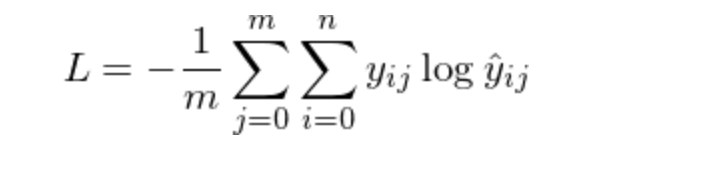

In [1]:
def cross_entropy(softmax_out, Y):
    """
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    m = softmax_out.shape[1]
    cost = -(1 / m) * np.sum(np.sum(Y * np.log(softmax_out + 0.001), axis=0, keepdims=True), axis=1)
    return cost

In [2]:
def skipgram_model_training(X, Y, vocab_size, emb_size, learning_rate, epochs, batch_size=256, parameters=None, print_cost=True, plot_cost=True):
    """
    X: Input word indices. shape: (1, m)
    Y: One-hot encodeing of output word indices. shape: (vocab_size, m)
    vocab_size: vocabulary size of your corpus or training data
    emb_size: word embedding size. How many dimensions to represent each vocabulary
    learning_rate: alaph in the weight update formula
    epochs: how many epochs to train the model
    batch_size: size of mini batch
    parameters: pre-trained or pre-initialized parameters
    print_cost: whether or not to print costs during the training process
    """
    costs = []
    m = X.shape[1]
    
    if parameters is None:
        parameters = initialize_parameters(vocab_size, emb_size)
    
    for epoch in range(epochs):
        epoch_cost = 0
        batch_inds = list(range(0, m, batch_size))
        np.random.shuffle(batch_inds)
        for i in batch_inds:
            X_batch = X[:, i:i+batch_size]
            Y_batch = Y[:, i:i+batch_size]

            softmax_out, caches = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(Y_batch, softmax_out, caches)
            update_parameters(parameters, caches, gradients, learning_rate)
            cost = cross_entropy(softmax_out, Y_batch)
            epoch_cost += np.squeeze(cost)
            
        costs.append(epoch_cost)
        if print_cost and epoch % (epochs // 500) == 0:
            print("Cost after epoch {}: {}".format(epoch, epoch_cost))
        if epoch % (epochs // 100) == 0:=            learning_rate *= 0.98
            
    if plot_cost:
        plt.plot(np.arange(epochs), costs)
        plt.xlabel('# of epochs')
        plt.ylabel('cost')
    return parameters

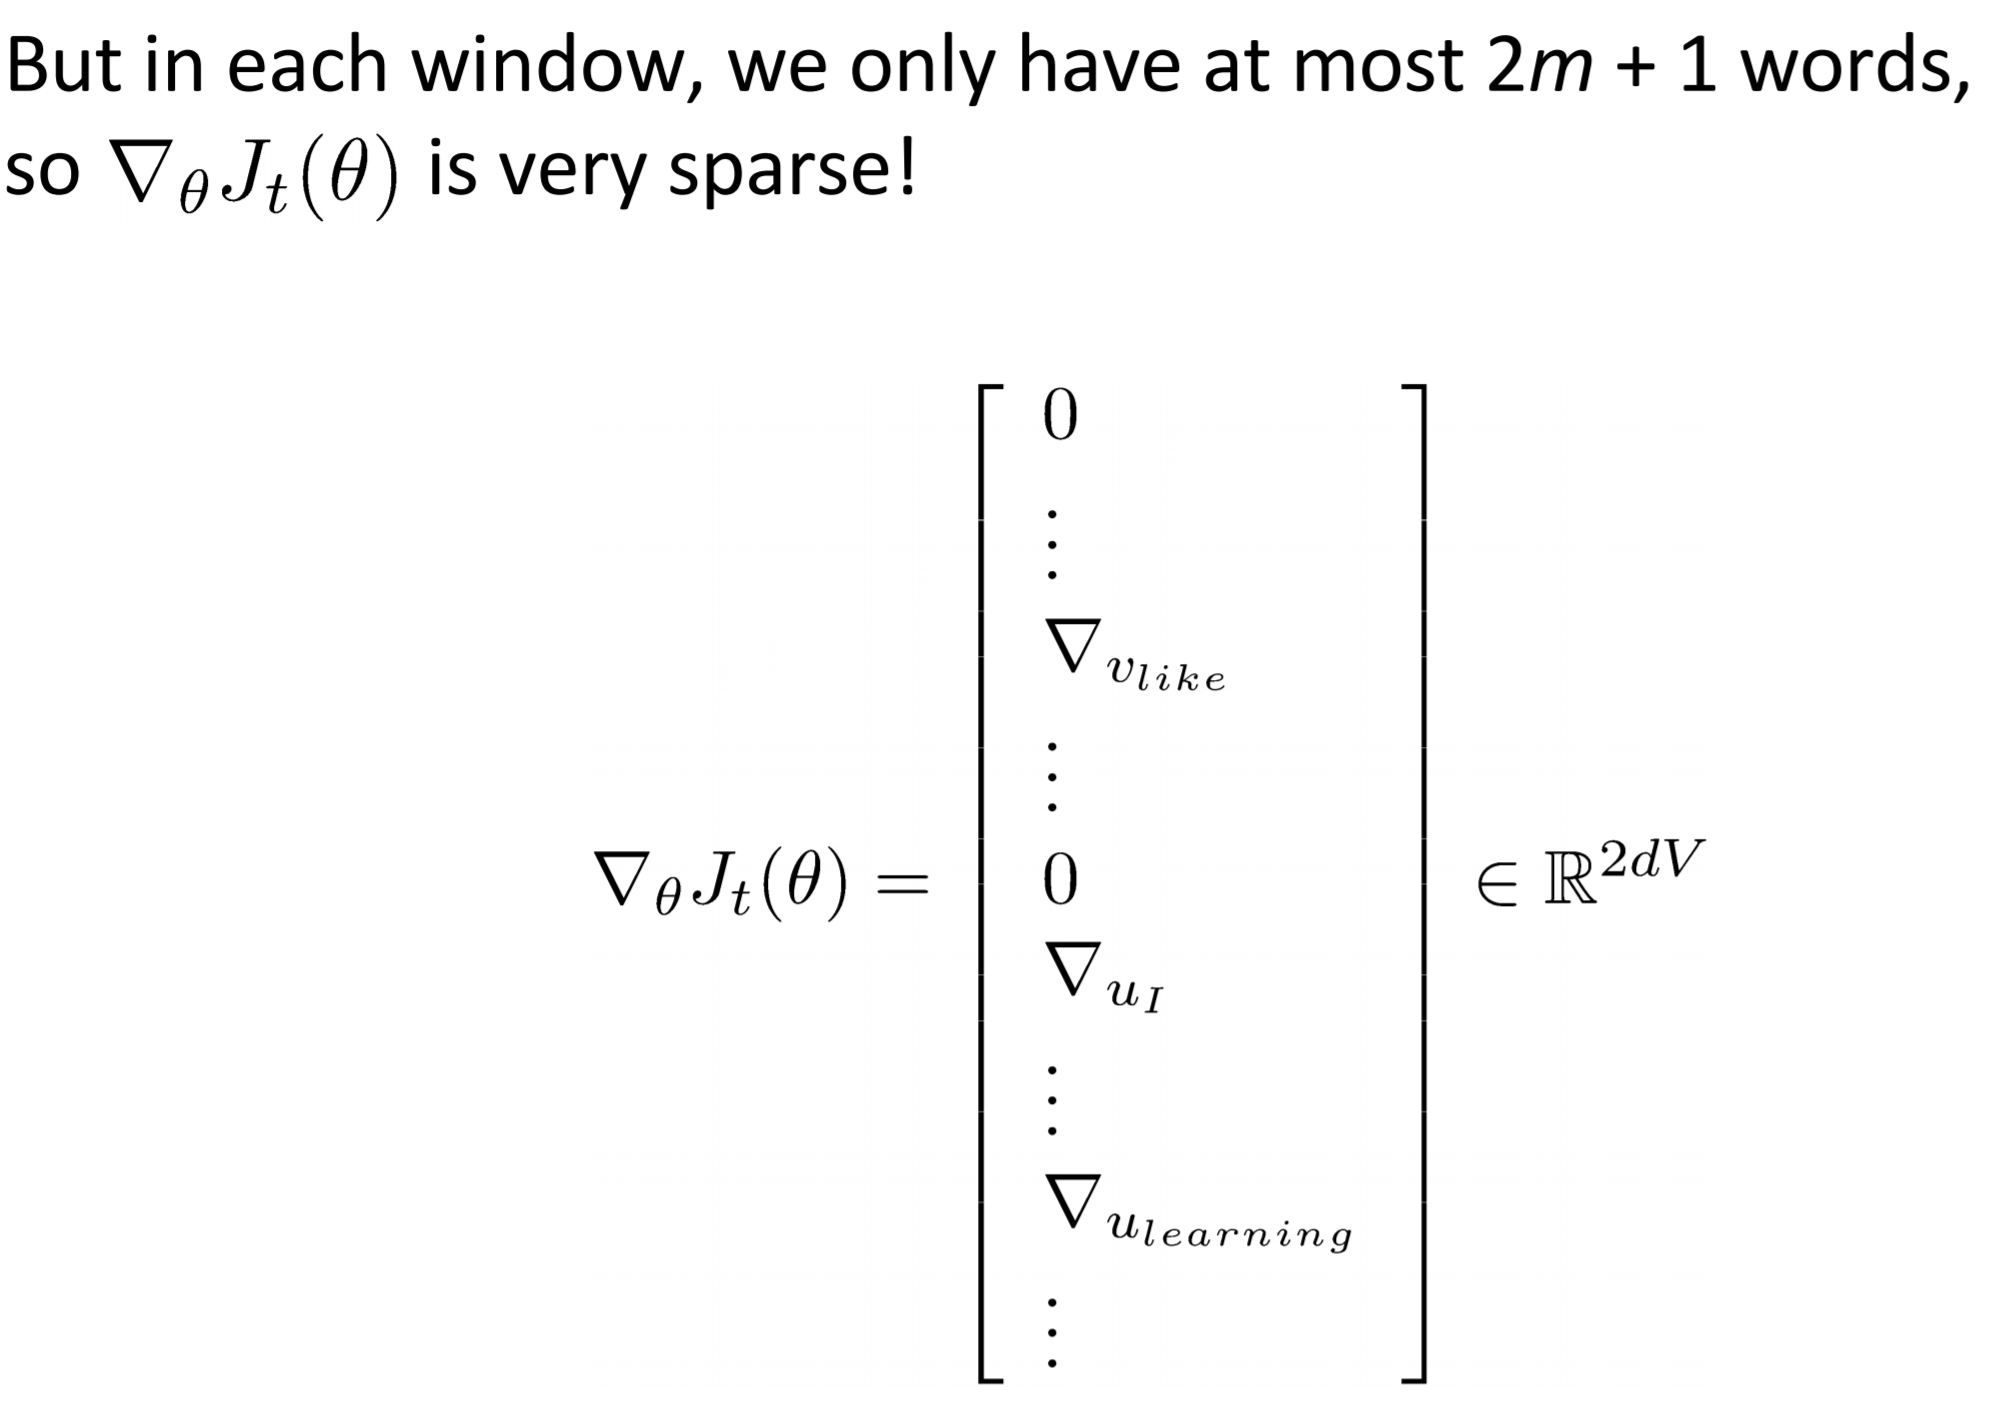

This part comes when I explain update equation optimization